## Customer Churn Analysis

### Data Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
file = pd.read_csv("C:\\Users\\HP\\Model.csv", index_col = 'customerID')
file.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Digging about the data!!

Each row gives information about the customer, there are total of 7043 entries with 20 variables to work with!
The Target for prediction is the'Churn' column, indicating whether or not the customer cancelled their service.

In [56]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


### Pandas Failure!!
#### And Technique to handle it

If you see clearly in above information about each variables/columns type, you will realize that 'TotalCharges' is of type 'object' instead it should be 'float64'.

Presence of type 'object' means that there are clearly some non-numeric values in variable 'TotalCharges'

So, initially we would like to convert 'TotalCharges' type to float.

In [57]:
file['TotalCharges'] = pd.to_numeric(file['TotalCharges'], errors = 'coerce')

In [58]:
file[file['TotalCharges'].isna() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [59]:
#file[file['TotalCharges'].isna() == True] = 0 
file['TotalCharges'].fillna(0, inplace = True)

In [60]:
file[file['TotalCharges'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No


In [61]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [62]:
file.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Converting categorical data to process the data

Next step is to convert the categorical values into numeric values, so algorithms can process the data

In [63]:
file['OnlineBackup'].unique()
file['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,0], inplace = True)

In [64]:
file['gender'].unique()
file['gender'].replace(['Female','Male'], [1,0], inplace = True)

In [65]:
file['Partner'].unique()
file['Partner'].replace(['Yes','No'], [1,0], inplace = True)

In [66]:
file['Dependents'].unique()
file.Dependents.replace(['Yes','No'], [1,0], inplace = True)

In [67]:
file['PhoneService'].unique()
file.PhoneService.replace(['Yes','No'], [1,0], inplace = True)

In [68]:
file['MultipleLines'].unique()
file.MultipleLines.replace(['No phone service','No','Yes'], [0,0,1], inplace = True)

In [69]:
file['InternetService'].unique()
file.InternetService.replace(['No','DSL','Fiber optic'],[0,1,2], inplace = True)

In [70]:
file['OnlineSecurity'].unique()
file.OnlineSecurity.replace(['No', 'No internet service', 'Yes'], [0,0,1], inplace = True)

In [71]:
file['DeviceProtection'].unique()
file.DeviceProtection.replace(['No', 'No internet service', 'Yes'], [0,0,1], inplace = True)

In [72]:
file['TechSupport'].unique()
file.TechSupport.replace(['No', 'No internet service', 'Yes'], [0,0,1], inplace = True)

In [73]:
file['StreamingTV'].unique()
file.StreamingTV.replace(['No', 'No internet service', 'Yes'], [0,0,1], inplace = True)

In [74]:
file['StreamingMovies'].unique()
file.StreamingMovies.replace(['No', 'No internet service', 'Yes'], [0,0,1], inplace = True)

In [75]:
file['Contract'].unique()
file.Contract.replace(['Month-to-month', 'One year', 'Two year'], [0,1,2], inplace = True)

In [76]:
file['PaperlessBilling'].unique()
file.PaperlessBilling.replace(['No', 'Yes'], [0,1], inplace = True)

In [77]:
file['PaymentMethod'].unique()
file.PaymentMethod.replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], [0,1,2,3], inplace = True)

In [78]:
file['Churn'].unique()
file.Churn.replace(['No', 'Yes'], [0,1], inplace = True)

In [79]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1+ MB


## Correlation between customer data features and customer churn

To decide which features or variables of the data to include in our predictive churn model, we will examine the correlation between churn and each customer features or variable.

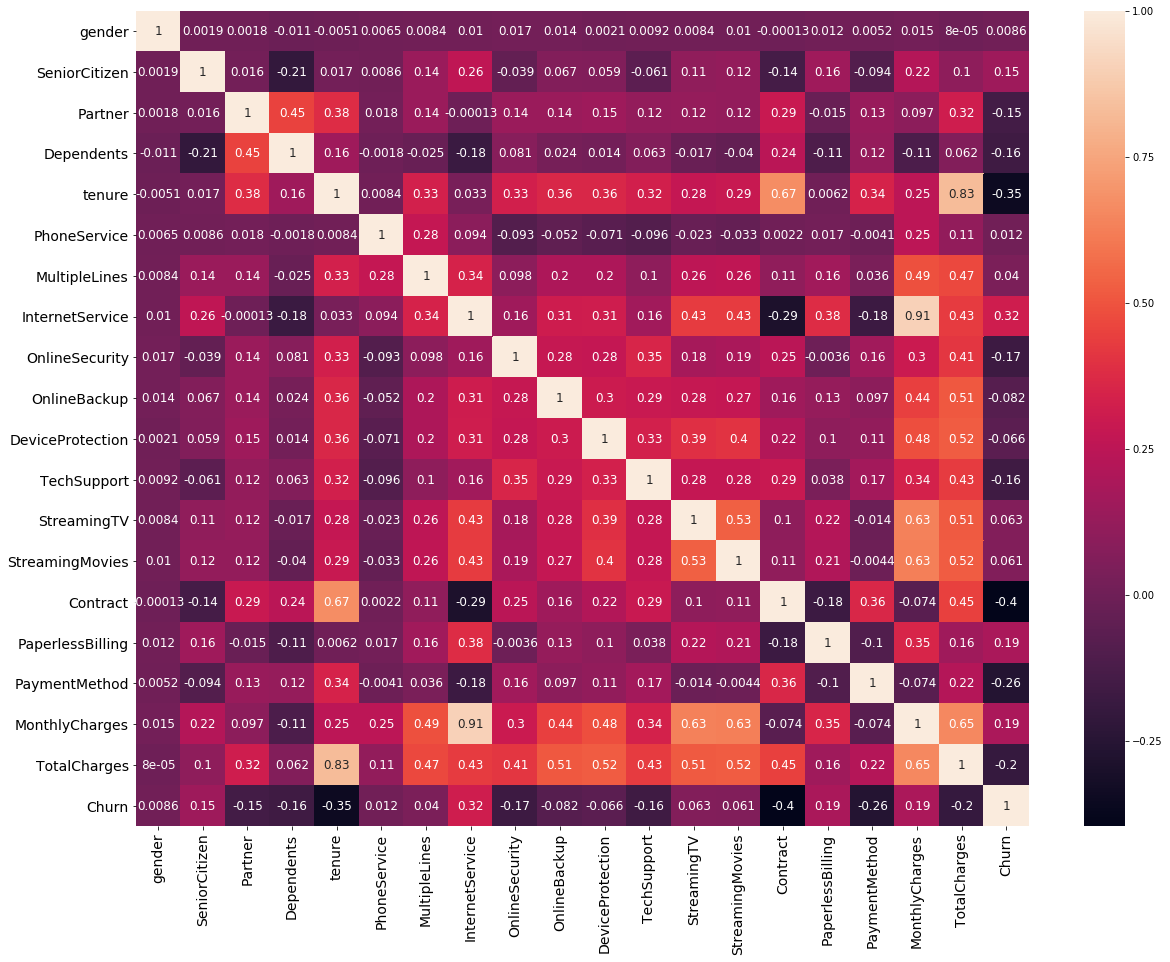

In [81]:
corr = file.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True, annot_kws = {'size':12})
heat_map = plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()